In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [2]:
#Do I need an exception model

In [3]:
import os
# Print the current working directory
print("Current working directory:", os.getcwd())

base_dir = "c:/Users/KatreeceHattaway/OneDrive - Sock Club/Desktop/UT_Data_Boot_Camp/ML_pneumonia_identification/Resources"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Check if directories exist
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))
print("Test directory exists:", os.path.exists(test_dir))


Current working directory: c:\Users\KatreeceHattaway\OneDrive - Sock Club\Desktop\UT_Data_Boot_Camp\ML_pneumonia_identification\Resources
Train directory exists: True
Validation directory exists: True
Test directory exists: True


In [4]:
# Set the number of images to loop through
num_train_images = 2000
num_val_images = 500
num_test_images = 500

In [5]:
#reprocess and resize the images to be able to train and test the model
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
# Load the images from directories
train_data_gen = train.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'  # Binary classification
)

val_data_gen = validation.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data_gen = test.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Print class indices to verify
print("Class indices:", train_data_gen.class_indices)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [7]:
# create a for loop to loop through all images?
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import layers, models

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of it
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
#train model?
# Train the model
history = model.fit(
    train_data_gen,
    epochs=10,
    validation_data=val_data_gen
)


Epoch 1/10


c:\Users\KatreeceHattaway\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.8820 - loss: 0.3543 - val_accuracy: 0.9375 - val_loss: 0.2110
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 428s 3s/step - accuracy: 0.9558 - loss: 0.1152 - val_accuracy: 0.9375 - val_loss: 0.1840
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 425s 3s/step - accuracy: 0.9586 - loss: 0.0968 - val_accuracy: 0.6250 - val_loss: 0.4633
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9634 - loss: 0.0985 - val_accuracy: 0.6875 - val_loss: 0.5373
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9642 - loss: 0.1003 - val_accuracy: 0.8750 - val_loss: 0.3255
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9657 - loss: 0.0850 - val_accuracy: 0.8750 - val_loss: 0.2168
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9648 - loss: 0.0838 - val_accuracy: 0.6875 - val_loss: 0.4323
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.9757 - loss: 0.0703 - val_accuracy: 0.875

In [9]:
#test model?
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data_gen)
print(f"Test Accuracy: {test_acc:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8467 - loss: 0.5820
Test Accuracy: 0.86


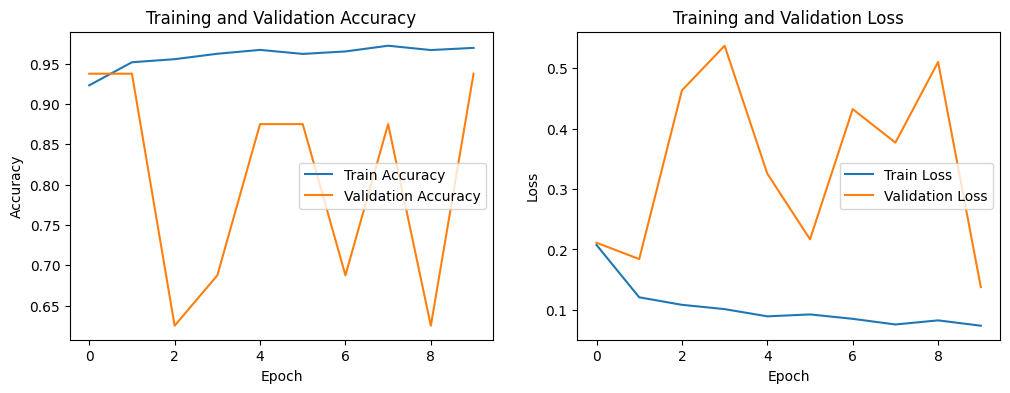

In [10]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
